In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['text.usetex']=True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
plt.rcParams.update({'font.size': 20})
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = [7.5, 4.5]

In [2]:
Data = pd.read_csv('/home/felipe/JoaoPino/1-LQsCollider_project/Data_MadGraph/Data_MadGraph.csv', sep=',')

In [3]:
#Get correlations
data = {r'$M_{S_1}$': list(Data['mS1']), r'$M_{S_2}$': list(Data['mS2']), r'$M_R$':list(Data['mR']),
        r'$\sigma (gg\rightarrow 1b + 1b + 2\ell)$':list(Data['xsec_GluonSplit (fb)']),
        r'$\sigma (gg\rightarrow 2\ell)$':list(Data['xsec_TChannel (fb)'])}

df = pd.DataFrame(data, columns = [r'$M_{S_1}$', r'$M_{S_2}$', r'$M_R$', r'$\sigma (gg\rightarrow 1b + 1b + 2\ell)$',
                                   r'$\sigma (gg\rightarrow 2\ell)$'])

corrMatrix = df.corr()

In [4]:
corrMatrix

,$M_{S_1}$,$M_{S_2}$,$M_R$,$\sigma (gg\rightarrow 1b + 1b + 2\ell)$,$\sigma (gg\rightarrow 2\ell)$
$M_{S_1}$,1.000000,-0.032960,-0.032975,-0.488291,-0.491724
$M_{S_2}$,-0.032960,1.000000,0.999957,0.044888,0.044655
$M_R$,-0.032975,0.999957,1.000000,0.044989,0.044745
$\sigma (gg\rightarrow 1b + 1b + 2\ell)$,-0.488291,0.044888,0.044989,1.000000,0.999715
$\sigma (gg\rightarrow 2\ell)$,-0.491724,0.044655,0.044745,0.999715,1.000000


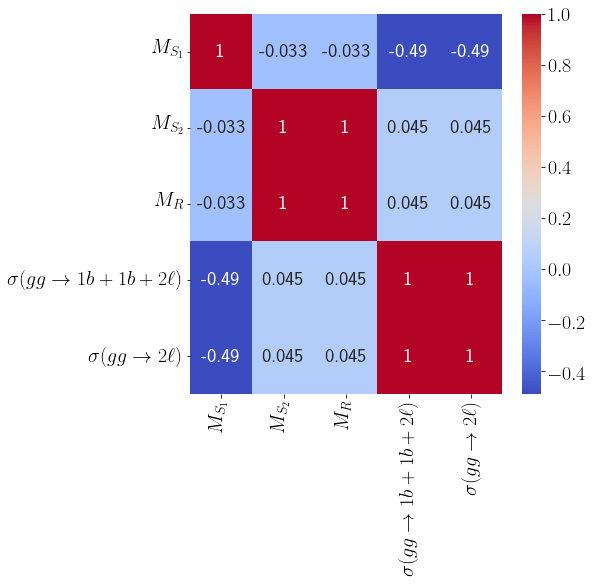

In [8]:
fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(corrMatrix,cmap= 'coolwarm', annot=True)
#plt.show()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/correlation.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/correlation.pdf', bbox_inches='tight', dpi=500.0)

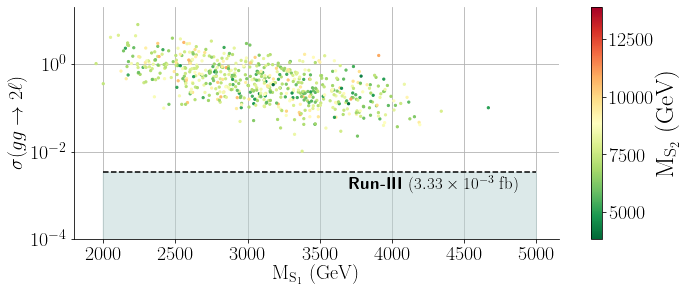

In [6]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data['mS1']
ys = Data['xsec_TChannel (fb)']
zs = Data['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(2000, 5000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(3700,0.4*run_III,'\\textbf{{Run-III}} $(${Xsec} $\\mathrm{{fb}})$'.format(Xsec = run_III_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_III,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_III,'--k')

plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 2\ell)$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-4, 20])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecTchannel_mS2.pdf', bbox_inches='tight', dpi=500.0)

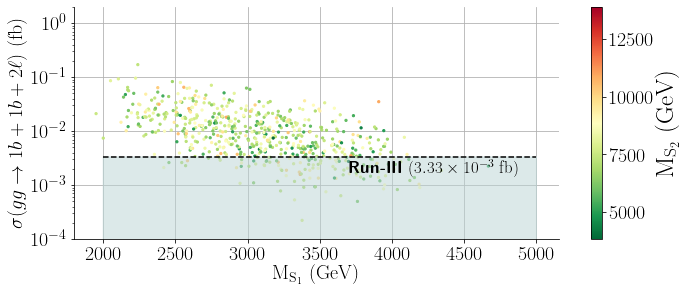

In [7]:
plt.figure(figsize=(10.5, 4.5))
ax = plt.subplot(111)
xs = Data['mS1']
ys = Data['xsec_GluonSplit (fb)']
zs = Data['mS2']
scat = ax.scatter(x=xs, y=ys, s=5.0, c=zs, marker="o", cmap="RdYlGn_r", rasterized=True)
colorb=plt.colorbar(scat,pad=0.05,fraction=0.2)
colorb.set_label(r'$\mathrm{M_{S_2}~(GeV)}$', fontsize=25)


### RUN-III sensitivity line ###
N = 1000
run_III = 1/300
sen_III = run_III*np.ones(N)
xline = np.linspace(2000, 5000, 1000)
run_III_xsec = ("$"+str(f"{run_III:.2e}").replace("e", "\\times 10^{")+"}$").replace("03", "3")

plt.text(3700,0.5*run_III,'\\textbf{{Run-III}} $(${Xsec} $\\mathrm{{fb}})$'.format(Xsec = run_III_xsec),fontsize=17)
plt.fill_between(x=xline,y1=0,y2=run_III,alpha=0.5,color="#bad4d4")
plt.plot(xline,sen_III,'--k')

plt.xlabel(r'$\mathrm{M_{S_1}~(GeV)}$')
plt.ylabel(r'$\sigma (gg\rightarrow 1b + 1b + 2\ell)~\mathrm{(fb)}$')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1e-4, 2])
plt.grid()
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2.png', bbox_inches='tight', dpi=1000.0)
plt.savefig('/home/felipe/JoaoPino/1-LQsCollider_project/Plots/mS1_vs_xsecGluonSplit_mS2.pdf', bbox_inches='tight', dpi=500.0)